In [1]:
# Import Dependencies
!pip show matplotlib mplcursors || (echo matplotlib and mplcursors not found && pip install matplotlib mplcursors)
import mplcursors
import pandas as pd
import hvplot.pandas
from pathlib import Path
import numpy as np
import bokeh.plotting as bp
import bokeh.models as bm
import matplotlib.pyplot as plt
import param
import datetime


Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Users/robertzygmuntlehr/opt/anaconda3/lib/python3.9/site-packages
Requires: contourpy, cycler, fonttools, importlib-resources, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: Cartopy, mplcursors, mpld3, seaborn, wordcloud
---
Name: mplcursors
Version: 0.5.2
Summary: Interactive data selection cursors for Matplotlib.
Home-page: https://github.com/anntzer/mplcursors
Author: Antony Lee
Author-email: 
License: MIT
Location: /Users/robertzygmuntlehr/opt/anaconda3/lib/python3.9/site-packages
Requires: matplotlib
Required-by: 


In [2]:
# Read in the data. 
crime_data = Path("Crime_Reports.csv")
df_crime_data = pd.read_csv(crime_data)
df_crime_data.columns

/var/folders/2h/v467wz0562dfskh2fgt2pqhm0000gn/T/ipykernel_47668/1768935015.py:3: DtypeWarning: Columns (16,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crime_data = pd.read_csv(crime_data)


Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [3]:
# Verify dataframe values
df_crime_data.head()


Incident Number  Highest Offense Description  Highest Offense Code  \
0      20072790876          DISTURBANCE - OTHER                  3401   
1      20065065520                FRAUD - OTHER                  1199   
2    2003421480455  CUSTODY ARREST TRAFFIC WARR                  3722   
3      20052602038       DOC UNREASONABLE NOISE                  2405   
4      20065065524                FRAUD - OTHER                  1199   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  10/05/2007 11:00:00 PM    10/05/2007         2300.0   
1               N  11/14/2006 12:00:00 AM    11/14/2006            0.0   
2               N  05/28/2003 08:16:00 AM    05/28/2003          816.0   
3               N                     NaN    09/17/2005            NaN   
4               N  11/14/2006 12:00:00 AM    11/14/2006            0.0   

         Report Date Time Report Date  Report Time  ... Census Tract  \
0  10/06/2007 11:46:00 AM  10/06/2007       1146.0  ...          NaN   
1  11/14/2006 12:00:00 AM  11/14/2006          0.0  ...          NaN   
2  05/28/2003 08:16:00 AM  05/28/2003        816.0  ...          NaN   
3  09/17/2005 09:45:00 PM  09/17/2005       2145.0  ...          NaN   
4  11/14/2006 12:00:00 AM  11/14/2006          0.0  ...          NaN   

  Clearance Status  Clearance Date  UCR Category Category Description  \
0              NaN             NaN           NaN                  NaN   
1              NaN             NaN           NaN                  NaN   
2                N             NaN           NaN                  NaN   
3              NaN      10/17/2005           NaN                  NaN   
4              NaN      12/13/2006           NaN                  NaN   

  X-coordinate Y-coordinate  Latitude Longitude Location  
0          NaN          NaN       NaN       NaN      NaN  
1          NaN          NaN       NaN       NaN      NaN  
2          0.0          0.0       NaN       NaN      NaN  
3          NaN          NaN       NaN       NaN      NaN  
4          NaN          NaN       NaN       NaN      NaN  

[5 rows x 27 columns]

In [5]:
# Check dataframe characteristics
se_df_crime_columns = df_crime_data.columns
se_df_crime_dtypes = df_crime_data.dtypes
df_crime_data_describe = df_crime_data.describe()
df_crime_data_describe


Incident Number  Highest Offense Code  Occurred Time   Report Time  \
count     2.371193e+06          2.371193e+06   2.371133e+06  2.371192e+06   
mean      6.205392e+10          1.690596e+03   1.323790e+03  1.329096e+03   
std       2.953522e+11          1.203680e+03   7.155323e+02  6.557841e+02   
min       2.003500e+04          1.000000e+02   0.000000e+00  0.000000e+00   
25%       2.005277e+10          6.010000e+02   8.150000e+02  9.140000e+02   
50%       2.010500e+10          1.400000e+03   1.430000e+03  1.406000e+03   
75%       2.016320e+10          2.716000e+03   1.930000e+03  1.850000e+03   
max       2.023931e+12          8.905000e+03   2.400000e+03  2.359000e+03   

           Zip Code  Council District  Census Tract  X-coordinate  \
count  2.360771e+06      2.328559e+06  2.352697e+06  2.364722e+06   
mean   7.873059e+04      4.946811e+00  2.553449e+02  3.075656e+06   
std    3.842746e+02      2.843126e+00  4.282032e+03  3.764119e+05   
min    0.000000e+00      1.000000e+00  1.000000e+00 -3.262185e+07   
25%    7.871700e+04      3.000000e+00  1.500000e+01  3.108442e+06   
50%    7.874100e+04      4.000000e+00  2.324000e+01  3.117292e+06   
75%    7.875200e+04      7.000000e+00  3.380000e+02  3.126587e+06   
max    7.875900e+04      1.000000e+01  9.601000e+05  3.889524e+07   

       Y-coordinate      Latitude     Longitude  
count  2.364729e+06  2.333299e+06  2.333299e+06  
mean   9.945008e+06  3.028987e+01 -9.773356e+01  
std    1.155737e+06  1.780063e-01  3.235840e-01  
min    0.000000e+00  1.185700e-04 -9.915672e+01  
25%    1.005744e+07  3.023270e+01 -9.775915e+01  
50%    1.007294e+07  3.027489e+01 -9.773212e+01  
75%    1.010030e+07  3.034969e+01 -9.770229e+01  
max    4.114066e+07  4.216665e+01 -1.320800e-04

In [6]:
# Show Columns
print(f"Characteristics of the Crime Reports Original Dataframe:\n\
      Column Names: {se_df_crime_columns}")

Characteristics of the Crime Reports Original Dataframe:
      Column Names: Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


In [7]:
# Datatypes
print(f"Characteristics of the Crime Reports Original Dataframe:\n\
      Column Datatyoes: {se_df_crime_dtypes}")

Characteristics of the Crime Reports Original Dataframe:
      Column Datatyoes: Incident Number                  int64
Highest Offense Description     object
Highest Offense Code             int64
Family Violence                 object
Occurred Date Time              object
Occurred Date                   object
Occurred Time                  float64
Report Date Time                object
Report Date                     object
Report Time                    float64
Location Type                   object
Address                         object
Zip Code                       float64
Council District               float64
APD Sector                      object
APD District                    object
PRA                             object
Census Tract                   float64
Clearance Status                object
Clearance Date                  object
UCR Category                    object
Category Description            object
X-coordinate                   float64
Y-coordinate          

# Data CLeaning
### Location, Latitude, and Longitude NaN Values

In [8]:
num_lat_lng_loc_na = len(df_crime_data[df_crime_data['Latitude'].isna() & df_crime_data['Longitude'].isna() & df_crime_data['Location'].isna()])
num_lat_na = len(df_crime_data[df_crime_data['Latitude'].isna() & df_crime_data['Location'].notna() & df_crime_data['Longitude'].notna()])
num_lng_na = len(df_crime_data[df_crime_data['Latitude'].notna() & df_crime_data['Location'].notna() & df_crime_data['Longitude'].isna()])
num_loc_na = len(df_crime_data[df_crime_data['Latitude'].notna() & df_crime_data['Location'].isna() & df_crime_data['Longitude'].notna()])
num_lat_lng_na = len(df_crime_data[df_crime_data['Latitude'].isna() & df_crime_data['Location'].notna() & df_crime_data['Longitude'].isna()])

print(f"\
      There are {num_lat_lng_loc_na} rows with NaN values in Lat, Lng, and Loc,\n\
      There are {num_lat_na} rows with NaN values in Lat,\n\
      There are {num_lng_na} rows with NaN values in Lng,\n\
      There are {num_loc_na} rows with NaN values in Loc,\n\
      There are {num_lat_lng_na} rows with NaN values in Lat and Lng")


      There are 37894 rows with NaN values in Lat, Lng, and Loc,
      There are 0 rows with NaN values in Lat,
      There are 0 rows with NaN values in Lng,
      There are 0 rows with NaN values in Loc,
      There are 0 rows with NaN values in Lat and Lng


# Data Cleaning

In [9]:
# Data CLeaning
# Step 1: Remove unnecessary columns
df_filtered_crime_data = df_crime_data[['Incident Number', 'Highest Offense Description', 'Highest Offense Code', 'Occurred Date Time', 'Report Date Time', 'Latitude', 'Longitude', 'Location']]

# Step 2: Rename columns
df_filtered_renamed_crime_data = df_filtered_crime_data.rename(columns={'Incident Number':'Crime ID', 'Highest Offense Description': 'Crime Type', 'Highest Offense Code': 'Crime Code'})

# convert datetime columns to datetime format
df_filtered_renamed_crime_data['Occurred Date Time'] = pd.to_datetime(df_filtered_renamed_crime_data['Occurred Date Time'])
df_filtered_renamed_crime_data['Report Date Time'] = pd.to_datetime(df_filtered_renamed_crime_data['Report Date Time'])

# Step 3: Add new columns for the years
df_filtered_renamed_crime_data['Report Year'] = df_filtered_renamed_crime_data['Report Date Time'].dt.year
df_filtered_renamed_crime_data['Occurred Year'] = df_filtered_renamed_crime_data['Occurred Date Time'].dt.year

# Remove all instances where crime occurred in 2023.
df_filtered_renamed_crime_data = df_filtered_renamed_crime_data[df_filtered_renamed_crime_data['Occurred Year'] != 2023.0]

# Find, count, and remove all instances where crime was reported before it occurred.
df_filtered_renamed_datetime_crime_data = df_filtered_renamed_crime_data[df_filtered_renamed_crime_data['Report Date Time'] >= df_filtered_renamed_crime_data['Occurred Date Time']]
df_minority_report = df_filtered_renamed_crime_data[df_filtered_renamed_crime_data['Report Date Time'] < df_filtered_renamed_crime_data['Occurred Date Time']]

# Find, count, and remove all instances where crime occurred outside of City of Austin City Limits.
df_filtered_renamed_datetime_loc_crime_data = df_filtered_renamed_datetime_crime_data.loc[((df_filtered_renamed_datetime_crime_data["Latitude"] <= 31) &
                                                                                           (df_filtered_renamed_datetime_crime_data["Latitude"] >= 30)) & 
                                                                                          ((df_filtered_renamed_datetime_crime_data["Longitude"] <= -97.5) & 
                                                                                           (df_filtered_renamed_datetime_crime_data["Longitude"] >= -98)), :]
df_out_heart_texas = df_filtered_renamed_datetime_crime_data.loc[((df_filtered_renamed_datetime_crime_data["Latitude"] > 31) | 
                                                                  (df_filtered_renamed_datetime_crime_data["Latitude"] < 30)) | 
                                                                 ((df_filtered_renamed_datetime_crime_data["Longitude"] > -97.5) | 
                                                                  (df_filtered_renamed_datetime_crime_data["Longitude"] < -98)), :]

# Step 4: Handle other missing values
df_filtered_renamed_datetime_loc_na_crime_data = df_filtered_renamed_datetime_loc_crime_data.dropna()

# Step 5: Reorder the columns in the dataframe to ease readability and understanding
df_filtered_renamed_datetime_loc_na_crime_data = df_filtered_renamed_datetime_loc_na_crime_data[['Crime ID', 'Crime Type', 'Crime Code', 'Occurred Year', 'Occurred Date Time', 'Report Year', 'Report Date Time', 'Latitude', 'Longitude', 'Location']]

# Step 5: Verify the changes
print("Outside of Austin Dataframe:", len(df_out_heart_texas))
print("Cleaned Dataframe:", len(df_filtered_renamed_datetime_loc_crime_data))
print("Dopped NA:", len(df_filtered_renamed_datetime_loc_na_crime_data))

Outside of Austin Dataframe: 268
Cleaned Dataframe: 2311139
Dopped NA: 2311139


In [10]:
# Show a segment of the dataframe
df_filtered_renamed_datetime_loc_na_crime_data.head(3)

Crime ID             Crime Type  Crime Code  Occurred Year  \
36271    20193141585  BURGLARY OF RESIDENCE         500         2019.0   
36272  2003921631169   THEFT BY SHOPLIFTING         607         2003.0   
36273    20115026281    BURGLARY OF VEHICLE         601         2011.0   

       Occurred Date Time  Report Year    Report Date Time   Latitude  \
36271 2019-11-10 21:05:00       2019.0 2019-11-10 21:48:00  30.438983   
36272 2003-06-12 15:48:00       2003.0 2003-06-12 15:49:00  30.306590   
36273 2011-05-26 20:00:00       2011.0 2011-05-27 01:22:00  30.233182   

       Longitude                     Location  
36271 -97.759669  (30.43898321, -97.75966943)  
36272 -97.749015  (30.30659021, -97.74901545)  
36273 -97.765474  (30.23318205, -97.76547366)

In [11]:
# Create Time columns from date-time columns
df_filtered_renamed_datetime_loc_na_crime_data["Occurred Time"] = df_filtered_renamed_datetime_loc_na_crime_data["Occurred Date Time"].dt.time
df_filtered_renamed_datetime_loc_na_crime_data["Report Time"] = df_filtered_renamed_datetime_loc_na_crime_data["Report Date Time"].dt.time

# Extract the Day of Week into new columns
df_filtered_renamed_datetime_loc_na_crime_data['Occurred Day of Week'] = df_filtered_renamed_datetime_loc_na_crime_data['Occurred Date Time'].dt.dayofweek
df_filtered_renamed_datetime_loc_na_crime_data['Report Day of Week'] = df_filtered_renamed_datetime_loc_na_crime_data['Report Date Time'].dt.dayofweek

In [12]:
# Convert Occurred Year and Report Year to datetime64[ns]
df_filtered_renamed_datetime_loc_na_crime_data['Occurred Year'] = pd.to_datetime(df_filtered_renamed_datetime_loc_na_crime_data['Occurred Year'], format='%Y')
df_filtered_renamed_datetime_loc_na_crime_data['Report Year'] = pd.to_datetime(df_filtered_renamed_datetime_loc_na_crime_data['Report Year'], format='%Y')

# Verify the changes (Monday = 0, Tuesday = 1,..., Sunday = 6)
df_filtered_renamed_datetime_loc_na_crime_data.head()

Crime ID                   Crime Type  Crime Code Occurred Year  \
36271    20193141585        BURGLARY OF RESIDENCE         500    2019-01-01   
36272  2003921631169         THEFT BY SHOPLIFTING         607    2003-01-01   
36273    20115026281          BURGLARY OF VEHICLE         601    2011-01-01   
36274    20031911608  CUSTODY ARREST TRAFFIC WARR        3722    2003-01-01   
36275    20055055292                   HARASSMENT        2703    2005-01-01   

       Occurred Date Time Report Year    Report Date Time   Latitude  \
36271 2019-11-10 21:05:00  2019-01-01 2019-11-10 21:48:00  30.438983   
36272 2003-06-12 15:48:00  2003-01-01 2003-06-12 15:49:00  30.306590   
36273 2011-05-26 20:00:00  2011-01-01 2011-05-27 01:22:00  30.233182   
36274 2003-07-10 20:40:00  2003-01-01 2003-07-10 20:40:00  30.215810   
36275 2005-03-20 12:00:00  2005-01-01 2005-10-26 14:28:00  30.350269   

       Longitude                     Location Occurred Time Report Time  \
36271 -97.759669  (30.43898321, -97.75966943)      21:05:00    21:48:00   
36272 -97.749015  (30.30659021, -97.74901545)      15:48:00    15:49:00   
36273 -97.765474  (30.23318205, -97.76547366)      20:00:00    01:22:00   
36274 -97.736915   (30.21581006, -97.7369149)      20:40:00    20:40:00   
36275 -97.747427  (30.35026938, -97.74742662)      12:00:00    14:28:00   

       Occurred Day of Week  Report Day of Week  
36271                     6                   6  
36272                     3                   3  
36273                     3                   4  
36274                     3                   3  
36275                     6                   2

In [13]:
df_filtered_renamed_datetime_loc_na_crime_data_alcohol = df_filtered_renamed_datetime_loc_na_crime_data.loc[(df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2100) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2102) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2111) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2103) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2108) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 3211) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2209) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2200) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2109) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2206) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2208) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2107) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2106) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2105) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 108) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2110) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2202) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2203) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 2104)
                              ,:]

df_filtered_renamed_datetime_loc_na_crime_data_mj = df_filtered_renamed_datetime_loc_na_crime_data.loc[(df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 1803) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 1825) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 1807) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 1826) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 1827) |
                              (df_filtered_renamed_datetime_loc_na_crime_data["Crime Code"] == 1827)
                              ,:]

# Print results:
print(f"We have {len(df_filtered_renamed_datetime_loc_na_crime_data_alcohol)} alcohol crimes and "\
      f"{len(df_filtered_renamed_datetime_loc_na_crime_data_mj)} mj crimes in Austin.")

We have 112690 alcohol crimes and 38499 mj crimes in Austin.


In [14]:
df_filtered_renamed_datetime_loc_na_crime_data_alcohol.head()

Crime ID Crime Type  Crime Code Occurred Year  Occurred Date Time  \
36311   2013180242        DWI        2100    2013-01-01 2013-01-18 03:47:00   
36325   2008380198        DWI        2100    2008-01-01 2008-02-07 02:43:00   
36330  20213630961        DWI        2100    2021-01-01 2021-12-29 17:51:00   
36337  20061680254        DWI        2100    2006-01-01 2006-06-17 01:52:00   
36353  20222451081        DWI        2100    2022-01-01 2022-09-02 16:58:00   

      Report Year    Report Date Time   Latitude  Longitude  \
36311  2013-01-01 2013-01-18 03:47:00  30.191337 -97.771015   
36325  2008-01-01 2008-02-07 02:43:00  30.266619 -97.739588   
36330  2021-01-01 2021-12-29 17:51:00  30.234221 -97.720434   
36337  2006-01-01 2006-06-17 01:52:00  30.244446 -97.737140   
36353  2022-01-01 2022-09-02 16:58:00  30.208282 -97.760996   

                          Location Occurred Time Report Time  \
36311  (30.19133708, -97.77101501)      03:47:00    03:47:00   
36325  (30.26661887, -97.73958826)      02:43:00    02:43:00   
36330  (30.23422117, -97.72043394)      17:51:00    17:51:00   
36337  (30.24444557, -97.73713963)      01:52:00    01:52:00   
36353  (30.20828161, -97.76099626)      16:58:00    16:58:00   

       Occurred Day of Week  Report Day of Week  
36311                     4                   4  
36325                     3                   3  
36330                     2                   2  
36337                     5                   5  
36353                     4                   4

In [15]:
df_filtered_renamed_datetime_loc_na_crime_data_mj.head()

Crime ID               Crime Type  Crime Code Occurred Year  \
36297    20103350025  POSSESSION OF MARIJUANA        1803    2010-01-01   
36317  2003724882791  POSSESSION OF MARIJUANA        1803    2003-01-01   
36375    20171401722  POSSESSION OF MARIJUANA        1803    2017-01-01   
36380     2010682048  POSSESSION OF MARIJUANA        1803    2010-01-01   
36595    20211900074  POSSESSION OF MARIJUANA        1803    2021-01-01   

       Occurred Date Time Report Year    Report Date Time   Latitude  \
36297 2010-12-01 00:12:00  2010-01-01 2010-12-01 00:12:00  30.379308   
36317 2003-03-21 12:30:00  2003-01-01 2003-03-21 12:30:00  30.234241   
36375 2017-05-20 21:58:00  2017-01-01 2017-05-20 23:00:00  30.354914   
36380 2010-03-09 20:37:00  2010-01-01 2010-03-09 20:37:00  30.235959   
36595 2021-07-09 01:00:00  2021-01-01 2021-07-16 21:29:00  30.283615   

       Longitude                     Location Occurred Time Report Time  \
36297 -97.695829  (30.37930769, -97.69582942)      00:12:00    00:12:00   
36317 -97.743780  (30.23424149, -97.74378044)      12:30:00    12:30:00   
36375 -97.700375  (30.35491448, -97.70037506)      21:58:00    23:00:00   
36380 -97.728499  (30.23595863, -97.72849885)      20:37:00    20:37:00   
36595 -97.752194   (30.2836147, -97.75219432)      01:00:00    21:29:00   

       Occurred Day of Week  Report Day of Week  
36297                     2                   2  
36317                     4                   4  
36375                     5                   5  
36380                     1                   1  
36595                     4                   4

<Axes: >

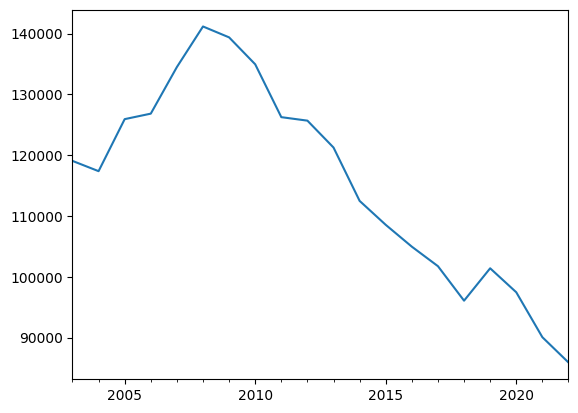

In [16]:
# Show graph of number of crimes by year
crime_counts_by_year = df_filtered_renamed_datetime_loc_na_crime_data["Occurred Year"].value_counts().sort_index()
crime_counts_by_year
crime_counts_by_year.plot(kind="line")

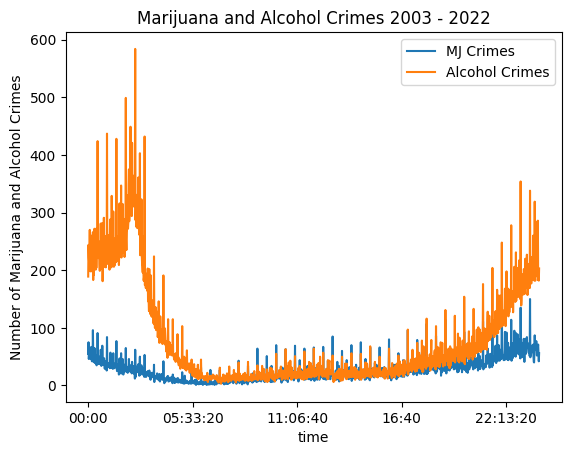

In [18]:
# Get crime counts by year for each dataframe
# crime_counts_by_year = df_filtered_renamed_datetime_loc_na_crime_data["Occurred Time"].value_counts().sort_index()
crime_counts_by_year_mj = df_filtered_renamed_datetime_loc_na_crime_data_mj["Occurred Time"].value_counts().sort_index()
crime_counts_by_year_alcohol = df_filtered_renamed_datetime_loc_na_crime_data_alcohol["Occurred Time"].value_counts().sort_index()

# Combine data from all three dataframes
# combined_data = pd.concat([crime_counts_by_year, crime_counts_by_year_mj, crime_counts_by_year_alcohol], axis=1)
# combined_data.columns = ["Total Crimes", "MJ Crimes", "Alcohol Crimes"]
combined_data = pd.concat([crime_counts_by_year_mj, crime_counts_by_year_alcohol], axis=1)
combined_data.columns = ["MJ Crimes", "Alcohol Crimes"]

# Plot the data on the same graph
combined_data.plot(kind="line",ylabel = "Number of Marijuana and Alcohol Crimes", title = "Marijuana and Alcohol Crimes 2003 - 2022")
plt.show()
# Use right-side of chart with different min-max for alcohol and marijuana.

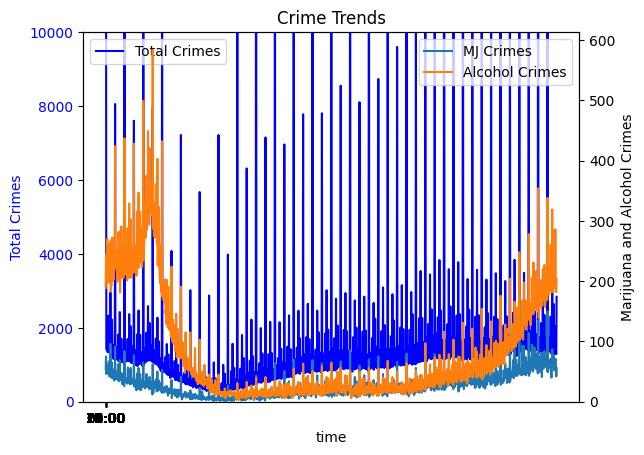

In [19]:
# Get crime counts by year for each dataframe
crime_counts_by_year = df_filtered_renamed_datetime_loc_na_crime_data["Occurred Time"].value_counts().sort_index()
crime_counts_by_year_mj = df_filtered_renamed_datetime_loc_na_crime_data_mj["Occurred Time"].value_counts().sort_index()
crime_counts_by_year_alcohol = df_filtered_renamed_datetime_loc_na_crime_data_alcohol["Occurred Time"].value_counts().sort_index()

# Combine data from all three dataframes
combined_data = pd.concat([crime_counts_by_year, crime_counts_by_year_mj, crime_counts_by_year_alcohol], axis=1)
combined_data.columns = ["Total Crimes", "MJ Crimes", "Alcohol Crimes"]

# Create a new figure and axis objects
fig, ax1 = plt.subplots()

# Plot the total crimes data on the left axis
combined_data["Total Crimes"].plot(kind="line", ax=ax1, color="blue")

# Set the label and y-axis limits for the left axis
ax1.set_ylabel("Total Crimes", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
# Set the y-axis limit for total crimes to be 10,000
ax1.set_ylim(0, 10000)
# ax1.set_ylim(bottom=0)

# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()

# Plot the marijuana and alcohol crimes data on the right axis
combined_data["MJ Crimes"].plot(kind="line", ax=ax2)
combined_data["Alcohol Crimes"].plot(kind="line", ax=ax2)

# Set the x-axis tick labels to show all 24 hours of the day
ax1.set_xticks(range(0, 24))
ax1.set_xticklabels(["{:02d}:00".format(h) for h in range(0, 24)])

# Set the label and y-axis limits for the right axis
ax2.set_ylabel("Marijuana and Alcohol Crimes", color="black")
ax2.tick_params(axis="y", labelcolor="black")
ax2.set_ylim(bottom=0)

# Add a title and legend to the plot
ax1.set_title("Crime Trends")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


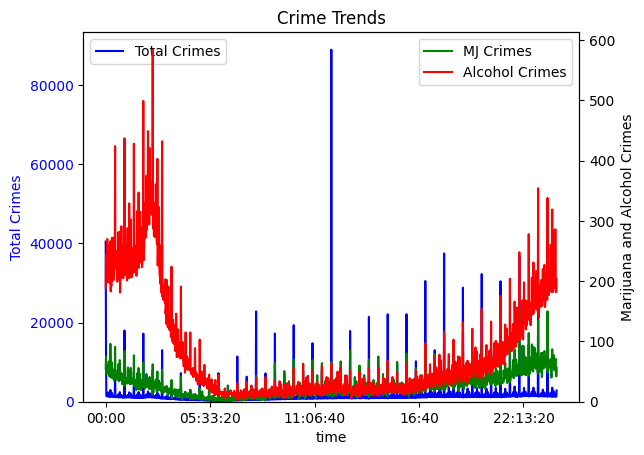

In [20]:
# Convert "Occurred Time" column to datetime
df_filtered_renamed_datetime_loc_na_crime_data["Occurred Date Time"] = pd.to_datetime(df_filtered_renamed_datetime_loc_na_crime_data["Occurred Date Time"])

# Filter the data to only include hours between 11:00am and 12:00pm
# df_filtered_renamed_datetime_loc_na_crime_data = df_filtered_renamed_datetime_loc_na_crime_data[(df_filtered_renamed_datetime_loc_na_crime_data["Occurred Date Time"].dt.hour >= 11) & (df_filtered_renamed_datetime_loc_na_crime_data["Occurred Date Time"].dt.hour <= 12)]

# Get crime counts by year for each dataframe
crime_counts_by_year = df_filtered_renamed_datetime_loc_na_crime_data["Occurred Time"].value_counts().sort_index()
crime_counts_by_year_mj = df_filtered_renamed_datetime_loc_na_crime_data_mj["Occurred Time"].value_counts().sort_index()
crime_counts_by_year_alcohol = df_filtered_renamed_datetime_loc_na_crime_data_alcohol["Occurred Time"].value_counts().sort_index()

# Combine data from all three dataframes
combined_data = pd.concat([crime_counts_by_year, crime_counts_by_year_mj, crime_counts_by_year_alcohol], axis=1)
combined_data.columns = ["Total Crimes", "MJ Crimes", "Alcohol Crimes"]

# Create a new figure and axis objects
fig, ax1 = plt.subplots()

# Plot the total crimes data on the left axis
combined_data["Total Crimes"].plot(kind="line", ax=ax1, color="blue")

# Set the label and y-axis limits for the left axis
ax1.set_ylabel("Total Crimes", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim(bottom=0)

# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()

# Plot the marijuana and alcohol crimes data on the right axis
combined_data["MJ Crimes"].plot(kind="line", ax=ax2, color="green")
combined_data["Alcohol Crimes"].plot(kind="line", ax=ax2, color="red")

# Set the label and y-axis limits for the right axis
ax2.set_ylabel("Marijuana and Alcohol Crimes", color="black")
ax2.tick_params(axis="y", labelcolor="black")
ax2.set_ylim(bottom=0)

# Add a title and legend to the plot
ax1.set_title("Crime Trends")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


In [21]:
highest_count_time = combined_data["Total Crimes"].idxmax()
print(highest_count_time)

12:00:00


In [23]:
df_12pm_crime_spike = df_filtered_renamed_datetime_loc_na_crime_data[(df_filtered_renamed_datetime_loc_na_crime_data["Occurred Date Time"].dt.hour == 12)]

len(df_12pm_crime_spike)
df_12pm_crime_spike.head(30)
df_12pm_crime_spike.groupby("Crime Type").count()["Crime ID"].sort_values(ascending = False)



Crime Type
THEFT                          25481
HARASSMENT                     10828
BURGLARY OF VEHICLE            10627
IDENTITY THEFT                  9650
CRIMINAL MISCHIEF               7493
                               ...  
MANSLAUGHTER                       1
PERJURY                            1
DRINKING AFTER CURFEW              1
BAIL JUMPING/FAIL TO APPEAR        1
ABANDONED REFRIGERATOR             1
Name: Crime ID, Length: 314, dtype: int64

In [24]:

# Filter the data to only include crimes reported at 11:00am
crimes_at_12pm = df_filtered_renamed_datetime_loc_na_crime_data[df_filtered_renamed_datetime_loc_na_crime_data["Occurred Date Time"].dt.time == datetime.time(12,0)]

# Print out a list of all crimes reported at 11:00am
print(crimes_at_12pm["Occurred Date Time"].unique())

['2005-03-20T12:00:00.000000000' '2016-10-26T12:00:00.000000000'
 '2021-07-14T12:00:00.000000000' ... '2022-03-07T12:00:00.000000000'
 '2022-06-19T12:00:00.000000000' '2022-07-26T12:00:00.000000000']


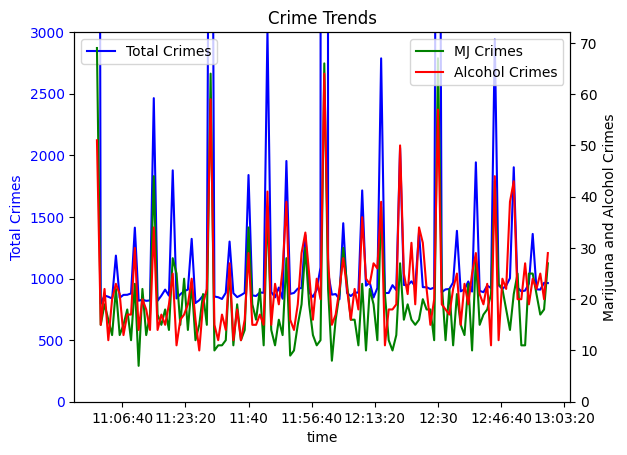

In [25]:
# Create a new figure and axis objects
fig, ax1 = plt.subplots()

# Filter the data to only include hours between 11:00am and 12:00pm
df_filtered_renamed_datetime_loc_na_crime_data = df_filtered_renamed_datetime_loc_na_crime_data[(df_filtered_renamed_datetime_loc_na_crime_data["Occurred Date Time"].dt.hour >= 11) & (df_filtered_renamed_datetime_loc_na_crime_data["Occurred Date Time"].dt.hour <= 12)]
df_filtered_renamed_datetime_loc_na_crime_data_mj = df_filtered_renamed_datetime_loc_na_crime_data_mj[(df_filtered_renamed_datetime_loc_na_crime_data_mj["Occurred Date Time"].dt.hour >= 11) & (df_filtered_renamed_datetime_loc_na_crime_data_mj["Occurred Date Time"].dt.hour <= 12)]
df_filtered_renamed_datetime_loc_na_crime_data_alcohol = df_filtered_renamed_datetime_loc_na_crime_data_alcohol[(df_filtered_renamed_datetime_loc_na_crime_data_alcohol["Occurred Date Time"].dt.hour >= 11) & (df_filtered_renamed_datetime_loc_na_crime_data_alcohol["Occurred Date Time"].dt.hour <= 12)]

# Get crime counts by year for each dataframe
crime_counts_by_year = df_filtered_renamed_datetime_loc_na_crime_data["Occurred Time"].value_counts().sort_index()
crime_counts_by_year_mj = df_filtered_renamed_datetime_loc_na_crime_data_mj["Occurred Time"].value_counts().sort_index()
crime_counts_by_year_alcohol = df_filtered_renamed_datetime_loc_na_crime_data_alcohol["Occurred Time"].value_counts().sort_index()

# Combine data from all three dataframes
combined_data = pd.concat([crime_counts_by_year, crime_counts_by_year_mj, crime_counts_by_year_alcohol], axis=1)
combined_data.columns = ["Total Crimes", "MJ Crimes", "Alcohol Crimes"]

# Create a new figure and axis objects
# fig, ax1 = plt.subplots()

# Plot the total crimes data on the left axis
combined_data["Total Crimes"].plot(kind="line", ax=ax1, color="blue")

# Set the label and y-axis limits for the left axis
ax1.set_ylabel("Total Crimes", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim(0, 3000)  # set y-axis limit to be 3000

# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()

# Plot the marijuana and alcohol crimes data on the right axis
combined_data["MJ Crimes"].plot(kind="line", ax=ax2, color="green")
combined_data["Alcohol Crimes"].plot(kind="line", ax=ax2, color="red")

# Set the label and y-axis limits for the right axis
ax2.set_ylabel("Marijuana and Alcohol Crimes", color="black")
ax2.tick_params(axis="y", labelcolor="black")
ax2.set_ylim(bottom=0)

# Add a title and legend to the plot
ax1.set_title("Crime Trends")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

/Users/robertzygmuntlehr/opt/anaconda3/lib/python3.9/site-packages/mplcursors/_pick_info.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  paths = scatter.__wrapped__(*args, **kwargs)


(0.0, 3000.0)

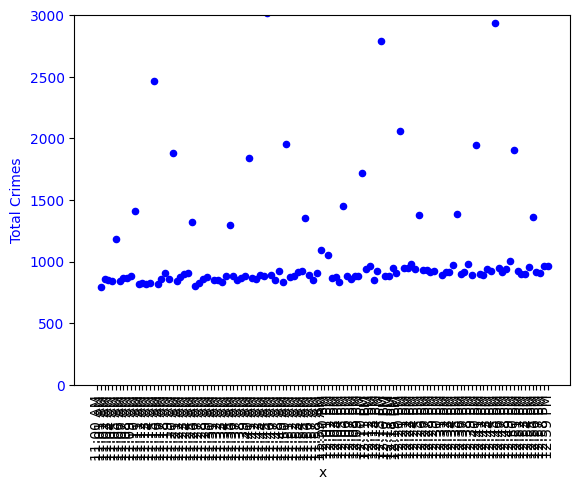

In [26]:
# Create a new figure and axis objects
fig, ax1 = plt.subplots()

# Filter the data to only include hours between 11:00am and 12:00pm
df_filtered_renamed_datetime_loc_na_crime_data = df_filtered_renamed_datetime_loc_na_crime_data[(df_filtered_renamed_datetime_loc_na_crime_data["Occurred Date Time"].dt.hour >= 11) & (df_filtered_renamed_datetime_loc_na_crime_data["Occurred Date Time"].dt.hour <= 12)]
df_filtered_renamed_datetime_loc_na_crime_data_mj = df_filtered_renamed_datetime_loc_na_crime_data_mj[(df_filtered_renamed_datetime_loc_na_crime_data_mj["Occurred Date Time"].dt.hour >= 11) & (df_filtered_renamed_datetime_loc_na_crime_data_mj["Occurred Date Time"].dt.hour <= 12)]
df_filtered_renamed_datetime_loc_na_crime_data_alcohol = df_filtered_renamed_datetime_loc_na_crime_data_alcohol[(df_filtered_renamed_datetime_loc_na_crime_data_alcohol["Occurred Date Time"].dt.hour >= 11) & (df_filtered_renamed_datetime_loc_na_crime_data_alcohol["Occurred Date Time"].dt.hour <= 12)]

# Get crime counts by year for each dataframe
crime_counts_by_year = df_filtered_renamed_datetime_loc_na_crime_data["Occurred Time"].value_counts().sort_index()
crime_counts_by_year_mj = df_filtered_renamed_datetime_loc_na_crime_data_mj["Occurred Time"].value_counts().sort_index()
crime_counts_by_year_alcohol = df_filtered_renamed_datetime_loc_na_crime_data_alcohol["Occurred Time"].value_counts().sort_index()

# Combine data from all three dataframes
combined_data = pd.concat([crime_counts_by_year, crime_counts_by_year_mj, crime_counts_by_year_alcohol], axis=1)
combined_data.columns = ["Total Crimes", "MJ Crimes", "Alcohol Crimes"]

# Create a new DataFrame with crime counts as a column
crime_counts_df = pd.DataFrame(combined_data["Total Crimes"])

# Add a new column with a range of values for the x-axis
crime_counts_df["x"] = range(len(crime_counts_df))

# Create a scatter plot of the crime counts
crime_counts_df.plot(kind="scatter", x="x", y="Total Crimes", ax=ax1, color="blue")

# Set the x-axis tick labels to be the times of day
x_ticks = range(len(crime_counts_df))
x_tick_labels = [time.strftime("%I:%M %p") for time in combined_data.index]
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_tick_labels, rotation=90)

# Set the label and y-axis limits for the left axis
ax1.set_ylabel("Total Crimes", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim(0, 3000)  # set y-axis limit to be 3000


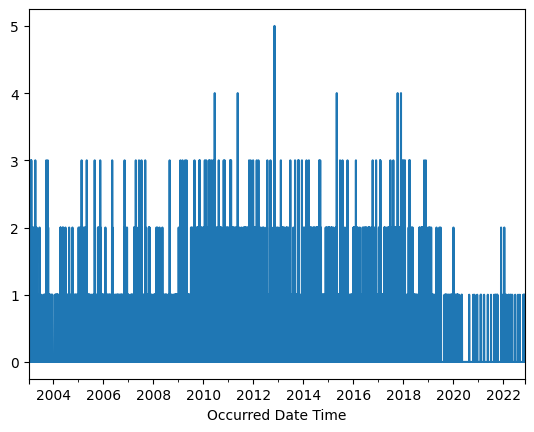

In [27]:
# Do another graph by day
# Get crime counts by day for each dataframe
crime_counts_by_day_mj = df_filtered_renamed_datetime_loc_na_crime_data_mj.groupby(pd.Grouper(key='Occurred Date Time', freq='D')).size().fillna(0)
crime_counts_by_day_alcohol = df_filtered_renamed_datetime_loc_na_crime_data_alcohol.groupby(pd.Grouper(key='Occurred Date Time', freq='D')).size().fillna(0)

# Combine data from all three dataframes
# combined_data = pd.concat([crime_counts_by_day_mj, crime_counts_by_day_alcohol], axis=1)
# combined_data.columns = ["MJ Crimes", "Alcohol Crimes"]

# Plot the data on the same graph
# combined_data.plot(kind="line")
crime_counts_by_day_mj.plot(kind="line")
plt.show()

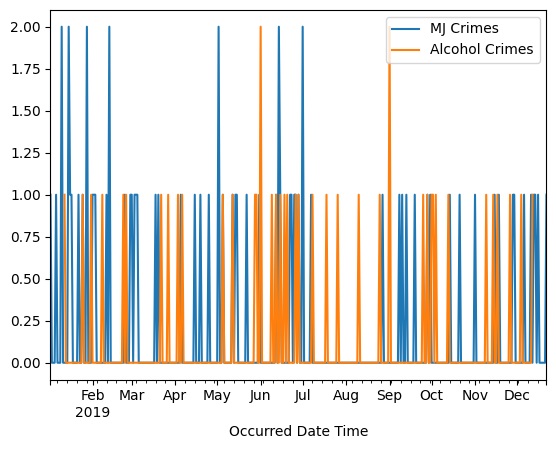

In [28]:
# Filter the data by year
df_filtered_mj_2019 = df_filtered_renamed_datetime_loc_na_crime_data_mj[df_filtered_renamed_datetime_loc_na_crime_data_mj['Occurred Date Time'].dt.year == 2019]
df_filtered_alcohol_2019 = df_filtered_renamed_datetime_loc_na_crime_data_alcohol[df_filtered_renamed_datetime_loc_na_crime_data_alcohol['Occurred Date Time'].dt.year == 2019]

# Get crime counts by day for each dataframe
crime_counts_by_day_mj = df_filtered_mj_2019.groupby(pd.Grouper(key='Occurred Date Time', freq='D')).size().fillna(0)
crime_counts_by_day_alcohol = df_filtered_alcohol_2019.groupby(pd.Grouper(key='Occurred Date Time', freq='D')).size().fillna(0)

# Combine data from all three dataframes
combined_data = pd.concat([crime_counts_by_day_mj, crime_counts_by_day_alcohol], axis=1)
combined_data.columns = ["MJ Crimes", "Alcohol Crimes"]

# Plot the data on the same graph
combined_data.plot(kind="line")
plt.show()


In [29]:
#  Convert Occurred Date Time column to datetime object
df_filtered_renamed_datetime_loc_na_crime_data_alcohol['Occurred Date Time'] = pd.to_datetime(df_filtered_renamed_datetime_loc_na_crime_data_alcohol['Occurred Date Time'])
df_filtered_renamed_datetime_loc_na_crime_data_mj['Occurred Date Time'] = pd.to_datetime(df_filtered_renamed_datetime_loc_na_crime_data_mj['Occurred Date Time'])

# Filter the dataframes to only include rows where the crime occurred in April 2016
df_filtered_renamed_datetime_loc_na_crime_data_alcohol_apr_2016 = df_filtered_renamed_datetime_loc_na_crime_data_alcohol[(df_filtered_renamed_datetime_loc_na_crime_data_alcohol['Occurred Date Time'].dt.year == 2016) & (df_filtered_renamed_datetime_loc_na_crime_data_alcohol['Occurred Date Time'].dt.month == 4)]
df_filtered_renamed_datetime_loc_na_crime_data_mj_apr_2016 = df_filtered_renamed_datetime_loc_na_crime_data_mj[(df_filtered_renamed_datetime_loc_na_crime_data_mj['Occurred Date Time'].dt.year == 2016) & (df_filtered_renamed_datetime_loc_na_crime_data_mj['Occurred Date Time'].dt.month == 4)]

# Group the dataframes by day and count the number of crimes per day
df_filtered_renamed_datetime_loc_na_crime_data_alcohol_apr_2016_count = df_filtered_renamed_datetime_loc_na_crime_data_alcohol_apr_2016.groupby(df_filtered_renamed_datetime_loc_na_crime_data_alcohol_apr_2016['Occurred Date Time'].dt.day)['Occurred Date Time'].count()
df_filtered_renamed_datetime_loc_na_crime_data_mj_apr_2016_count = df_filtered_renamed_datetime_loc_na_crime_data_mj_apr_2016.groupby(df_filtered_renamed_datetime_loc_na_crime_data_mj_apr_2016['Occurred Date Time'].dt.day)['Occurred Date Time'].count()

# Print the results
print("Alcohol-related crimes in April 2016:")
print(df_filtered_renamed_datetime_loc_na_crime_data_alcohol_apr_2016_count)
print("\n")
print("Marijuana-related crimes in April 2016:")
print(df_filtered_renamed_datetime_loc_na_crime_data_mj_apr_2016_count)



Alcohol-related crimes in April 2016:
Occurred Date Time
4     1
13    1
14    1
19    1
28    1
29    2
30    1
Name: Occurred Date Time, dtype: int64


Marijuana-related crimes in April 2016:
Occurred Date Time
4     1
6     2
7     1
11    1
13    1
14    1
15    1
18    1
19    1
26    1
27    1
Name: Occurred Date Time, dtype: int64


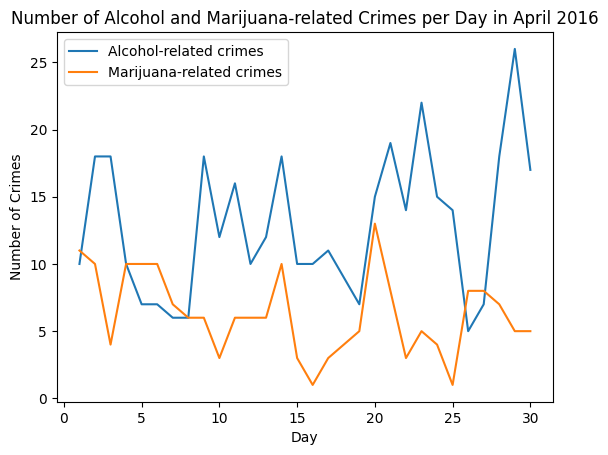

In [80]:
import matplotlib.pyplot as plt

# Plot the number of alcohol-related crimes per day in April 2016
df_filtered_renamed_datetime_loc_na_crime_data_alcohol_apr_2016_count.plot(kind='line', label='Alcohol-related crimes')

# Plot the number of marijuana-related crimes per day in April 2016
df_filtered_renamed_datetime_loc_na_crime_data_mj_apr_2016_count.plot(kind='line', label='Marijuana-related crimes')

# Set the title and labels of the plot
plt.title('Number of Alcohol and Marijuana-related Crimes per Day in April 2016')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')

# Show the legend
plt.legend()

# Show the plot
plt.show()

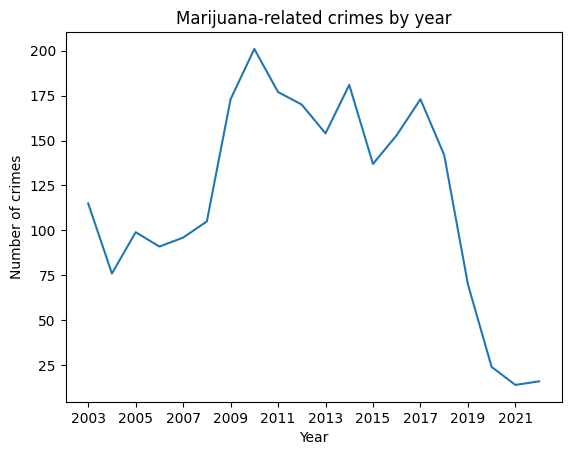

In [131]:
# Convert Occurred Date Time column to datetime object
df_filtered_renamed_datetime_loc_na_crime_data['Occurred Date Time'] = pd.to_datetime(df_filtered_renamed_datetime_loc_na_crime_data['Occurred Date Time'])
df_filtered_renamed_datetime_loc_na_crime_data_alcohol['Occurred Date Time'] = pd.to_datetime(df_filtered_renamed_datetime_loc_na_crime_data_alcohol['Occurred Date Time'])
df_filtered_renamed_datetime_loc_na_crime_data_mj['Occurred Date Time'] = pd.to_datetime(df_filtered_renamed_datetime_loc_na_crime_data_mj['Occurred Date Time'])

# Group the data by year and count the number of crimes per year
df_filtered_renamed_datetime_loc_na_crime_data_year_count = df_filtered_renamed_datetime_loc_na_crime_data.groupby(df_filtered_renamed_datetime_loc_na_crime_data['Occurred Date Time'].dt.year)['Occurred Date Time'].count()
df_filtered_renamed_datetime_loc_na_crime_data_alcohol_year_count = df_filtered_renamed_datetime_loc_na_crime_data_alcohol.groupby(df_filtered_renamed_datetime_loc_na_crime_data_alcohol['Occurred Date Time'].dt.year)['Occurred Date Time'].count()
df_filtered_renamed_datetime_loc_na_crime_data_mj_year_count = df_filtered_renamed_datetime_loc_na_crime_data_mj.groupby(df_filtered_renamed_datetime_loc_na_crime_data_mj['Occurred Date Time'].dt.year)['Occurred Date Time'].count()

# Plot the data
plt.plot(df_filtered_renamed_datetime_loc_na_crime_data_mj_year_count.index, df_filtered_renamed_datetime_loc_na_crime_data_mj_year_count.values)
plt.title('Marijuana-related crimes by year')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.xticks(range(2003, 2023, 2))
plt.show()

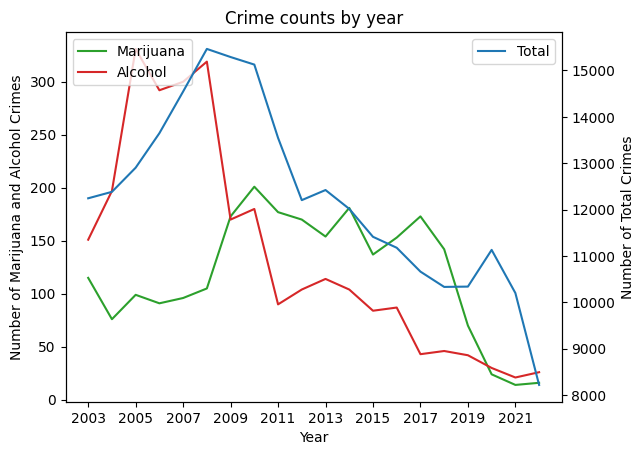

In [135]:
# Convert Occurred Date Time column to datetime object
df_filtered_renamed_datetime_loc_na_crime_data['Occurred Date Time'] = pd.to_datetime(df_filtered_renamed_datetime_loc_na_crime_data['Occurred Date Time'])
df_filtered_renamed_datetime_loc_na_crime_data_alcohol['Occurred Date Time'] = pd.to_datetime(df_filtered_renamed_datetime_loc_na_crime_data_alcohol['Occurred Date Time'])
df_filtered_renamed_datetime_loc_na_crime_data_mj['Occurred Date Time'] = pd.to_datetime(df_filtered_renamed_datetime_loc_na_crime_data_mj['Occurred Date Time'])

# Group the data by year and count the number of crimes per year
df_filtered_renamed_datetime_loc_na_crime_data_year_count = df_filtered_renamed_datetime_loc_na_crime_data.groupby(df_filtered_renamed_datetime_loc_na_crime_data['Occurred Date Time'].dt.year)['Occurred Date Time'].count()
df_filtered_renamed_datetime_loc_na_crime_data_alcohol_year_count = df_filtered_renamed_datetime_loc_na_crime_data_alcohol.groupby(df_filtered_renamed_datetime_loc_na_crime_data_alcohol['Occurred Date Time'].dt.year)['Occurred Date Time'].count()
df_filtered_renamed_datetime_loc_na_crime_data_mj_year_count = df_filtered_renamed_datetime_loc_na_crime_data_mj.groupby(df_filtered_renamed_datetime_loc_na_crime_data_mj['Occurred Date Time'].dt.year)['Occurred Date Time'].count()
df_filtered_renamed_datetime_loc_na_crime_data_total_year_count = df_filtered_renamed_datetime_loc_na_crime_data_year_count + df_filtered_renamed_datetime_loc_na_crime_data_alcohol_year_count

# Plot the data
fig, ax1 = plt.subplots()

# Plot the marijuana and alcohol data on the left axis
ax1.plot(df_filtered_renamed_datetime_loc_na_crime_data_mj_year_count.index, df_filtered_renamed_datetime_loc_na_crime_data_mj_year_count.values, color='tab:green', label='Marijuana')
ax1.plot(df_filtered_renamed_datetime_loc_na_crime_data_alcohol_year_count.index, df_filtered_renamed_datetime_loc_na_crime_data_alcohol_year_count.values, color='tab:red', label='Alcohol')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Marijuana and Alcohol Crimes')
ax1.set_xticks(range(2003, 2023, 2))

# Create a second y-axis for the total crime data on the right side
ax2 = ax1.twinx()
ax2.plot(df_filtered_renamed_datetime_loc_na_crime_data_total_year_count.index, df_filtered_renamed_datetime_loc_na_crime_data_total_year_count.values, color='tab:blue', label='Total')
ax2.set_ylabel('Number of Total Crimes')

# Add a title and legend
plt.title('Crime counts by year')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

#XKCD theme
plt.xkcd(scale = 1,length = 100, randomness = 2)

plt.show()


In [19]:
mj_map = df_filtered_renamed_datetime_loc_na_crime_data_mj.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500
)

mj_map


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [20]:
alcohol_map = df_filtered_renamed_datetime_loc_na_crime_data_alcohol.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500
)

alcohol_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [28]:


# Load data
crime_data_df = pd.read_csv("Crime_Reports.csv", low_memory=False)

In [29]:
crime_data_df.head(1)

Incident Number Highest Offense Description  Highest Offense Code  \
0      20072790876         DISTURBANCE - OTHER                  3401   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  10/05/2007 11:00:00 PM    10/05/2007         2300.0   

         Report Date Time Report Date  Report Time  ... Census Tract  \
0  10/06/2007 11:46:00 AM  10/06/2007       1146.0  ...          NaN   

  Clearance Status  Clearance Date  UCR Category Category Description  \
0              NaN             NaN           NaN                  NaN   

  X-coordinate Y-coordinate  Latitude Longitude Location  
0          NaN          NaN       NaN       NaN      NaN  

[1 rows x 27 columns]

In [32]:
# Convert date column to datetime type
crime_data_df['Occurred Date Time'] = pd.to_datetime(crime_data_df['Occurred Date Time'])

# DEBUG: Print output
crime_data_df['Occurred Date Time'].head(1)

0   2007-10-05 23:00:00
Name: Occurred Date Time, dtype: datetime64[ns]

In [33]:
# Defining Functions
# Define function to filter data by crime type
def filter_data(crime_type):
    filtered_data = crime_data_df[crime_data_df['Highest Offense Description'] == crime_type]
    return filtered_data

# Define function to create plot
def create_plot(data):
    source = bm.ColumnDataSource(data)
    p = bp.figure(x_axis_type='datetime', plot_width=800, plot_height=400)
    p.line('Date', 'Count', source=source)
    p.title.text = 'Crime Reports'
    p.xaxis.axis_label = 'Date'
    p.yaxis.axis_label = 'Count'
    return p

In [45]:
crime_data_df['Highest Offense Description'].head(3)

# Define list of crime types
crime_types = crime_data_df['Highest Offense Description'].unique().tolist()

# DEBUG: Print output
len(crime_types)
print(crime_types[:2])

['DISTURBANCE - OTHER', 'FRAUD - OTHER']


In [52]:
# Redefine radio button widget
radio_button = pn.widgets.Select(options=crime_types)

# Redefine select button widget
select_button = pn.widgets.Select(options=[2014, 2015, 2016, 2017, 2018])


# Define function to update plot
def update_plot(event):
    crime_type = radio_button.value
    year = select_button.value
    filtered_data = filter_data(crime_type)
    if year != 'All':
        filtered_data = filtered_data[filtered_data['Year'] == year]
    plot = create_plot(filtered_data)
    crime_plot.source.data.update(plot.source.data)


In [53]:
# Initial plot
initial_data = filter_data(crime_types[0])
crime_plot = create_plot(initial_data)